<a href="https://colab.research.google.com/github/Ennio1996/APRENDIZADO-DE-MAQUINA-NAO-SUPERVISIONADO/blob/main/1_BIG_5_TEST_Projeto_de_Aprendizado_n%C3%A3o_Supervisionado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## BIG 5 TEST Projeto de Aprendizado não Supervisionado
Projeto com o objetivo de clusterizar participantes do Big Five Personality Test para entender quais pessoas estão em quais dos 5 grupos de personalidade

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from io import open
pd.options.display.max_columns = 150

In [ ]:
dbtest = pd.read_csv('data-final.csv', sep='\t')

In [ ]:
dbtest.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.00,1.00,5.00,2.00,5.00,1.00,5.00,2.00,4.00,1.00,1.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,2.00,5.00,2.00,4.00,2.00,3.00,2.00,4.00,3.00,4.00,3.00,4.00,3.00,2.00,2.00,4.00,4.00,2.00,4.00,4.00,5.00,1.00,4.00,1.00,4.00,1.00,5.00,3.00,4.00,5.00,9419.00,5491.00,3959.00,4821.00,5611.00,2756.00,2388.00,2113.00,5900.00,4110.00,6135.00,4150.00,5739.00,6364.00,3663.00,5070.00,5709.00,4285.00,2587.00,3997.00,4750.00,5475.00,11641.00,3115.00,3207.00,3260.00,10235.00,5897.00,1758.00,3081.00,6602.00,5457.00,1569.00,2129.00,3762.00,4420.00,9382.00,5286.00,4983.00,6339.00,3146.00,4067.00,2959.00,3411.00,2170.00,4920.00,4436.00,3116.00,2992.00,4354.00,2016-03-03 02:01:01,768.00,1024.00,9.00,234.00,6,1,GB,51.5448,0.1991
1,3.00,5.00,3.00,4.00,3.00,3.00,2.00,5.00,1.00,5.00,2.00,3.00,4.00,1.00,3.00,1.00,2.00,1.00,3.00,1.00,1.00,4.00,1.00,5.00,1.00,5.00,3.00,4.00,5.00,3.00,3.00,2.00,5.00,3.00,3.00,1.00,3.00,3.00,5.00,3.00,1.00,2.00,4.00,2.00,3.00,1.00,4.00,2.00,5.00,3.00,7235.00,3598.00,3315.00,2564.00,2976.00,3050.00,4787.00,3228.00,3465.00,3309.00,9036.00,2406.00,3484.00,3359.00,3061.00,2539.00,4226.00,2962.00,1799.00,1607.00,2158.00,2090.00,2143.00,2807.00,3422.00,5324.00,4494.00,3627.00,1850.00,1747.00,5163.00,5240.00,7208.00,2783.00,4103.00,3431.00,3347.00,2399.00,3360.00,5595.00,2624.00,4985.00,1684.00,3026.00,4742.00,3336.00,2718.00,3374.00,3096.00,3019.00,2016-03-03 02:01:20,1360.00,768.00,12.00,179.00,11,1,MY,3.1698,101.706
2,2.00,3.00,4.00,4.00,3.00,2.00,1.00,3.00,2.00,5.00,4.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,4.00,1.00,4.00,2.00,4.00,1.00,4.00,4.00,3.00,4.00,2.00,2.00,2.00,3.00,3.00,4.00,2.00,4.00,2.00,5.00,1.00,2.00,1.00,4.00,2.00,5.00,3.00,4.00,4.00,4657.00,3549.00,2543.00,3335.00,5847.00,2540.00,4922.00,3142.00,14621.00,2191.00,5128.00,3675.00,3442.00,4546.00,8275.00,2185.00,2164.00,1175.00,3813.00,1593.00,1089.00,2203.00,3386.00,1464.00,2562.00,1493.00,3067.00,13719.00,3892.00,4100.00,4286.00,4775.00,2713.00,2813.00,4237.00,6308.00,2690.00,1516.00,2379.00,2983.00,1930.00,1470.00,1644.00,1683.00,2229.00,8114.00,2043.00,6295.00,1585.00,2529.00,2016-03-03 02:01:56,1366.00,768.00,3.00,186.00,7,1,GB,54.9119,-1.3833
3,2.00,2.00,2.00,3.00,4.00,2.00,2.00,4.00,1.00,4.00,3.00,3.00,3.00,2.00,3.00,2.00,2.00,2.00,4.00,3.00,2.00,4.00,3.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,2.00,4.00,4.00,4.00,1.00,2.00,2.00,3.00,1.00,4.00,4.00,2.00,5.00,2.00,3.00,1.00,4.00,4.00,3.00,3.00,3996.00,2896.00,5096.00,4240.00,5168.00,5456.00,4360.00,4496.00,5240.00,4000.00,3736.00,4616.00,3015.00,2711.00,3960.00,4064.00,4208.00,2936.00,7336.00,3896.00,6062.00,11952.00,1040.00,2264.00,3664.00,3049.00,4912.00,7545.00,4632.00,6896.00,2824.00,520.00,2368.00,3225.00,2848.00,6264.00,3760.00,10472.00,3192.00,7704.00,3456.00,6665.00,1977.00,3728.00,4128.00,3776.00,2984.00,4192.00,3480.00,3257.00,2016-03-03 02:02:02,1920.00,1200.00,186.00,219.00,7,1,GB,51.75,-1.25
4,3.00,3.00,3.00,3.00,5.00,3.00,3.00,5.00,3.00,4.00,1.00,5.00,5.00,3.00,1.00,1.00,1.00,1.00,3.00,2.00,1.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,5.00,3.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,1.00,5.00,5.00,5.00,1.00,5.00,1.00,5.00,1.00,5.00,3.00,5.00,5.00,6004.00,3965.00,2721.00,3706.00,2968.00,2426.00,7339.00,3302.00,16819.00,3731.00,4740.00,2856.00,7461.00,2179.00,3324.00,2255.00,430

Excluindo colunas com informações irrelevantes para o projeto

In [ ]:
dbtest.drop(dbtest.columns[50:110], axis=1, inplace=True)

In [ ]:
dbtest.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.00,1.00,5.00,2.00,5.00,1.00,5.00,2.00,4.00,1.00,1.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,2.00,5.00,2.00,4.00,2.00,3.00,2.00,4.00,3.00,4.00,3.00,4.00,3.00,2.00,2.00,4.00,4.00,2.00,4.00,4.00,5.00,1.00,4.00,1.00,4.00,1.00,5.00,3.00,4.00,5.00
1,3.00,5.00,3.00,4.00,3.00,3.00,2.00,5.00,1.00,5.00,2.00,3.00,4.00,1.00,3.00,1.00,2.00,1.00,3.00,1.00,1.00,4.00,1.00,5.00,1.00,5.00,3.00,4.00,5.00,3.00,3.00,2.00,5.00,3.00,3.00,1.00,3.00,3.00,5.00,3.00,1.00,2.00,4.00,2.00,3.00,1.00,4.00,2.00,5.00,3.00
2,2.00,3.00,4.00,4.00,3.00,2.00,1.00,3.00,2.00,5.00,4.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,4.00,1.00,4.00,2.00,4.00,1.00,4.00,4.00,3.00,4.00,2.00,2.00,2.00,3.00,3.00,4.00,2.00,4.00,2.00,5.00,1.00,2.00,1.00,4.00,2.00,5.00,3.00,4.00,4.00
3,2.00,2.00,2.00,3.00,4.00,2.00,2.00,4.00,1.00,4.00,3.00,3.00,3.00,2.00,3.00,2.00,2.00,2.00,4.00,3.00,2.00,4.00,3.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,2.00,4.00,4.00,4.00,1.00,2.00,2.00,3.00,1.00,4.00,4.00,2.00,5.00,2.00,3.00,1.00,4.00,4.00,3.00,3.00
4,3.00,3.00,3.00,3.00,5.00,3.00,3.00,5.00,3.00,4.00,1.00,5.00,5.00,3.00,1.00,1.00,1.00,1.00,3.00,2.00,1.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,5.00,3.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,1.00,5.00,5.00,5.00,1.00,5.00,1.00,5.00,1.00,5.00,3.00,5.00,5.00


Analise Exploratoria

In [ ]:
pd.options.display.float_format = "{:.2f}".format
dbtest.describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00
mean,2.65,2.77,3.29,3.14,3.28,2.40,2.77,3.41,2.96,3.56,3.29,3.17,3.85,2.66,2.84,2.84,3.05,2.68,3.09,2.77,2.26,3.83,2.26,3.93,2.27,3.74,2.20,3.69,3.79,3.59,3.30,2.93,3.98,2.62,2.63,2.83,3.70,2.47,3.20,3.59,3.65,2.08,4.00,2.00,3.79,1.89,3.98,3.18,4.12,3.96
std,1.26,1.32,1.22,1.24,1.28,1.23,1.40,1.27,1.35,1.31,1.35,1.23,1.16,1.25,1.27,1.33,1.29,1.34,1.30,1.32,1.34,1.14,1.28,1.13,1.17,1.22,1.12,1.10,1.17,1.08,1.18,1.39,1.04,1.25,1.27,1.42,1.13,1.14,1.28,1.05,1.16,1.11,1.10,1.09,0.99,1.10,1.01,1.26,1.04,1.03
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,2.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,3.00,2.00,2.00,3.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,3.00,1.00,3.00,1.00,3.00,3.00,3.00,3.00,2.00,3.00,2.00,2.00,2.00,3.00,2.00,2.00,3.00,3.00,1.00,3.00,1.00,3.00,1.00,3.00,2.00,4.00,3.00
50%,3.00,3.00,3.00,3.00,3.00,2.00,3.00,4.00,3.00,4.00,3.00,3.00,4.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,2.00,4.00,2.00,4.00,2.00,4.00,2.00,4.00,4.00,4.00,3.00,3.00,4.00,2.00,3.00,3.00,4.00,2.00,3.00,4.00,4.00,2.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,4.00
75%,4.00,4.00,4.00,4.00,4.00,3.00,4.00,4.00,4.00,5.00,4.00,4.00,5.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,5.00,3.00,5.00,3.00,5.00,3.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,3.00,4.00,4.00,5.00,3.00,5.00,3.00,5.00,2.00,5.00,4.00,5.00,5.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00


Como o teste tem valores de 1 a 5, podemos observar que tem algo errado nos dados com o valor min 0 que deveria ser 1

In [ ]:
dbtest[(dbtest == 0.00).all(axis=1)].describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00
mean,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
std,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
dbtest = dbtest[(dbtest > 0.00).all(axis=1)]

In [ ]:
dbtest.describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00
mean,2.65,2.80,3.30,3.17,3.30,2.41,2.78,3.44,2.98,3.59,3.31,3.20,3.87,2.69,2.85,2.87,3.06,2.69,3.10,2.80,2.25,3.87,2.27,3.96,2.29,3.78,2.21,3.72,3.81,3.62,3.34,2.95,4.00,2.63,2.63,2.84,3.73,2.48,3.22,3.63,3.70,2.07,4.04,2.00,3.82,1.90,4.02,3.22,4.17,3.98
std,1.25,1.31,1.19,1.21,1.24,1.21,1.38,1.24,1.33,1.27,1.32,1.19,1.13,1.23,1.25,1.30,1.27,1.32,1.27,1.31,1.32,1.08,1.27,1.08,1.16,1.17,1.11,1.04,1.13,1.03,1.12,1.37,1.00,1.23,1.25,1.40,1.08,1.12,1.25,1.00,1.10,1.10,1.04,1.07,0.93,1.08,0.94,1.22,0.97,0.99
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,2.00,2.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,3.00,2.00,2.00,3.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,3.00,1.00,3.00,1.00,3.00,3.00,3.00,3.00,2.00,3.00,2.00,2.00,2.00,3.00,2.00,2.00,3.00,3.00,1.00,3.00,1.00,3.00,1.00,4.00,2.00,4.00,3.00
50%,3.00,3.00,3.00,3.00,3.00,2.00,3.00,4.00,3.00,4.00,3.00,3.00,4.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,2.00,4.00,2.00,4.00,2.00,4.00,2.00,4.00,4.00,4.00,3.00,3.00,4.00,2.00,2.00,3.00,4.00,2.00,3.00,4.00,4.00,2.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,4.00
75%,4.00,4.00,4.00,4.00,4.00,3.00,4.00,4.00,4.00,5.00,4.00,4.00,5.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,5.00,3.00,5.00,3.00,5.00,3.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,3.00,4.00,4.00,5.00,3.00,5.00,3.00,5.00,2.00,5.00,4.00,5.00,5.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00


##Clusterizando os dados
usando Scikitlearn e Yellowbrick

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

O kmeans é um algoritmo de clusterização que possui como objetivo agrupar as amostras que possuem características semelhantes. Esse processo de clusterização é uma ótima ferramenta para análise de dados, segmentação de clientes, sistemas de recomendação.

In [ ]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,10))

Pegando uma amostra e testando o numero de clusteres a partir do metodo Elbow


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

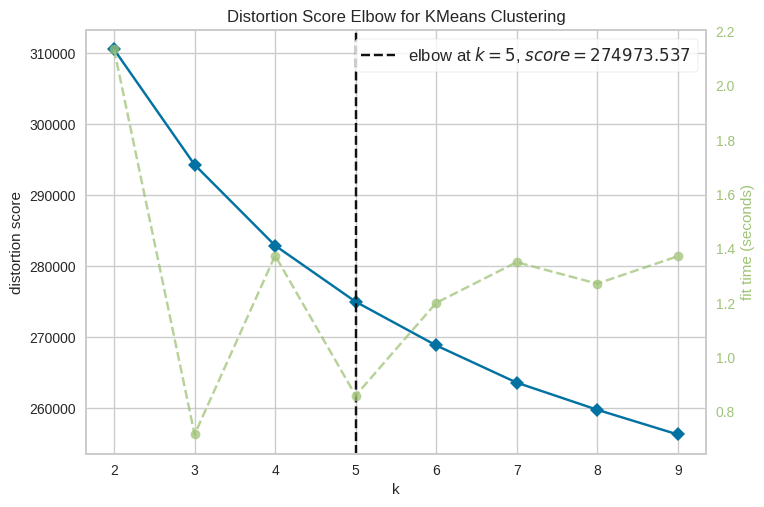

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
data_sample = dbtest.sample(n=5000, random_state=1)
visualizer.fit(data_sample)
visualizer.poof()

Agrupando em 5 grupos

In [ ]:
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(dbtest)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Etiquetando em que grupo cada pessoa pertence

In [ ]:
predictions = k_fit.labels_
dbtest['Clusters'] = predictions
dbtest.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,Clusters
0,4.00,1.00,5.00,2.00,5.00,1.00,5.00,2.00,4.00,1.00,1.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,2.00,5.00,2.00,4.00,2.00,3.00,2.00,4.00,3.00,4.00,3.00,4.00,3.00,2.00,2.00,4.00,4.00,2.00,4.00,4.00,5.00,1.00,4.00,1.00,4.00,1.00,5.00,3.00,4.00,5.00,1
1,3.00,5.00,3.00,4.00,3.00,3.00,2.00,5.00,1.00,5.00,2.00,3.00,4.00,1.00,3.00,1.00,2.00,1.00,3.00,1.00,1.00,4.00,1.00,5.00,1.00,5.00,3.00,4.00,5.00,3.00,3.00,2.00,5.00,3.00,3.00,1.00,3.00,3.00,5.00,3.00,1.00,2.00,4.00,2.00,3.00,1.00,4.00,2.00,5.00,3.00,2
2,2.00,3.00,4.00,4.00,3.00,2.00,1.00,3.00,2.00,5.00,4.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,4.00,1.00,4.00,2.00,4.00,1.00,4.00,4.00,3.00,4.00,2.00,2.00,2.00,3.00,3.00,4.00,2.00,4.00,2.00,5.00,1.00,2.00,1.00,4.00,2.00,5.00,3.00,4.00,4.00,2
3,2.00,2.00,2.00,3.00,4.00,2.00,2.00,4.00,1.00,4.00,3.00,3.00,3.00,2.00,3.00,2.00,2.00,2.00,4.00,3.00,2.00,4.00,3.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,2.00,4.00,4.00,4.00,1.00,2.00,2.00,3.00,1.00,4.00,4.00,2.00,5.00,2.00,3.00,1.00,4.00,4.00,3.00,3.00,0
4,3.00,3.00,3.00,3.00,5.00,3.00,3.00,5.00,3.00,4.00,1.00,5.00,5.00,3.00,1.00,1.00,1.00,1.00,3.00,2.00,1.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,5.00,3.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,1.00,5.00,5.00,5.00,1.00,5.00,1.00,5.00,1.00,5.00,3.00,5.00,5.00,1


In [ ]:
dbtest["Clusters"].value_counts()

4    193376
1    182276
2    181951
3    170702
0    146129
Name: Clusters, dtype: int64

In [ ]:
col_list = list(dbtest)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

In [ ]:
data_soma = pd.DataFrame()
data_soma['extroversion'] = dbtest[ext].sum(axis=1)/10
data_soma['neurotic'] = dbtest[est].sum(axis=1)/10
data_soma['agreeable'] = dbtest[agr].sum(axis=1)/10
data_soma['conscientious'] = dbtest[csn].sum(axis=1)/10
data_soma['open'] = dbtest[opn].sum(axis=1)/10
data_soma['clusters'] = predictions

In [ ]:
data_soma.groupby('clusters').mean()

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,3.00,2.63,2.95,3.03,3.25
1,3.09,2.42,3.21,3.11,3.34
2,3.06,3.01,3.20,3.16,3.24
3,2.97,3.66,3.16,3.18,3.25
4,3.07,3.43,3.31,3.22,3.37


In [ ]:
data_clusters = data_soma.groupby('clusters').mean()


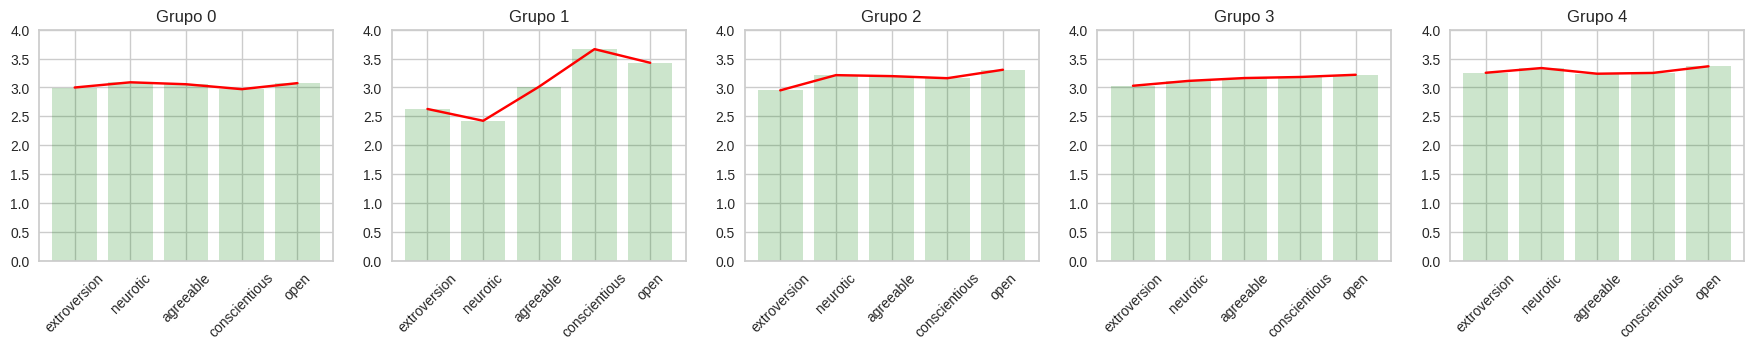

In [ ]:
plt.figure(figsize=(22,3))
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(data_clusters.columns, data_clusters.iloc[:, i], color='green', alpha=0.2)
    plt.plot(data_clusters.columns, data_clusters.iloc[:, i], color='red')
    plt.title('Grupo ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,4);